
# Analysis of New York Times Articles

This Jupyter Notebook provides an analysis of New York Times articles. The dataset used in this analysis contains various attributes of the articles such as section, title, abstract, byline, and keywords. The following steps are performed in this notebook:

1. **Data Loading and Preprocessing**:
    - Load the dataset from a CSV file.
    - Convert the `keywords` column from string representation of lists to actual lists.
    - Display the first few rows of the dataset.

2. **Data Exploration**:
    - List all the columns in the dataset.
    - Identify and handle missing values in important columns such as `section`, `title`, `abstract`, and `byline`.

3. **Data Visualization**:
    - Plot the frequency of articles in different sections.
    - Extract and plot the top 10 authors based on the byline information.
    - Extract and plot the top 10 keywords associated with the articles.

This notebook uses various Python libraries such as `pandas` for data manipulation, `matplotlib` for plotting, and `re` for regular expression operations. The visualizations provide insights into the distribution of articles across different sections, the most prolific authors, and the most common keywords.


In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import re
import ast
import warnings

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [2]:
# Importing csv file into pandas dataframe
df = pd.read_csv('NY-Times-articles.csv', index_col=0)
df['keywords'] = df['keywords'].apply(ast.literal_eval)     # Converting keywords column back into list
df.head()

,section,subsection,title,abstract,byline,updated_date,created_date,published_date,keywords
0,movies,NaN,Guy Pearce Never Needed to Be a Movie Star,After roles in “Memento” and “L.A. Confidentia...,By Kyle Buchanan and Caroline Tompkins,2025-01-15T17:14:15-05:00,2025-01-15T05:01:18-05:00,2025-01-15T05:01:18-05:00,"[Movies, Actors and Actresses, Television, Con..."
1,arts,design,The Design Legacy of Los Angeles That Fell to ...,The finality of the wildfires’ destruction has...,By Sam Lubell,2025-01-15T20:47:36-05:00,2025-01-15T18:33:52-05:00,2025-01-15T18:33:52-05:00,"[Architecture, Southern California Wildfires (..."
2,theater,NaN,"In a ‘Show Boat’ Reboot, Ol’ Man River Gets an...",“Show/Boat: A River” reverses the racial lens ...,By Jesse Green,2025-01-15T21:48:46-05:00,2025-01-15T20:00:06-05:00,2025-01-15T20:00:06-05:00,"[Theater, Theater (Off Broadway), Under the Ra..."
3,arts,music,"Drake Sues His Label, Calling Kendrick Lamar’s...","In a federal lawsuit on Wednesday, Drake accus...",By Joe Coscarelli,2025-01-15T21:47:53-05:00,2025-01-15T10:17:04-05:00,2025-01-15T10:17:04-05:00,"[Rap and Hip-Hop, Libel and Slander, Suits and..."
4,arts,music,A Top Pianist and a Great Composer Walk Into a...,"After the pianist, Vikingur Olafsson, asked fo...",By Joshua Barone,2025-01-15T10:48:40-05:00,2025-01-15T10:48:40-05:00,2025-01-15T10:48:40-05:00,"[Classical Music, After the Fall (Musical Work..."


In [3]:
# List of all columns in the dataset
list(df.columns)

['section',
 'subsection',
 'title',
 'abstract',
 'byline',
 'updated_date',
 'created_date',
 'published_date',
 'keywords']

In [4]:
# Checking for null values in dates field
df[df[['updated_date', 'created_date', 'published_date']].isnull().any(axis=1)]     # No null values to remove

,section,subsection,title,abstract,byline,updated_date,created_date,published_date,keywords


In [5]:
# Checking for null values and removing them
df.drop(df[df[['section', 'title', 'abstract', 'byline']].isnull().any(axis=1)].index, axis=0, inplace=True)

- **Note**:
Subsection and Keywords column can be empty, if the topic of article is vague. Hence it is not checked.

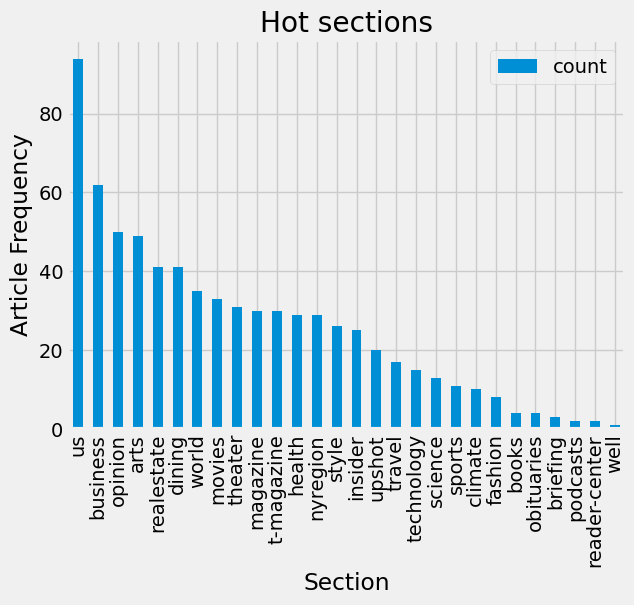

In [6]:
# Visualizing the top sections where most articles were written

df.section.value_counts().plot(kind='bar')

plt.xlabel('Section')
plt.ylabel('Article Frequency')
plt.title('Hot sections')
plt.legend()

In [7]:
# Function to break the byline column into a list of authors.

def getAuthors(byline: str):
    authors = re.split(r'\s*(?:By|and|,)\s*', byline)
    authors_list = [item for item in authors if item]
    return authors_list

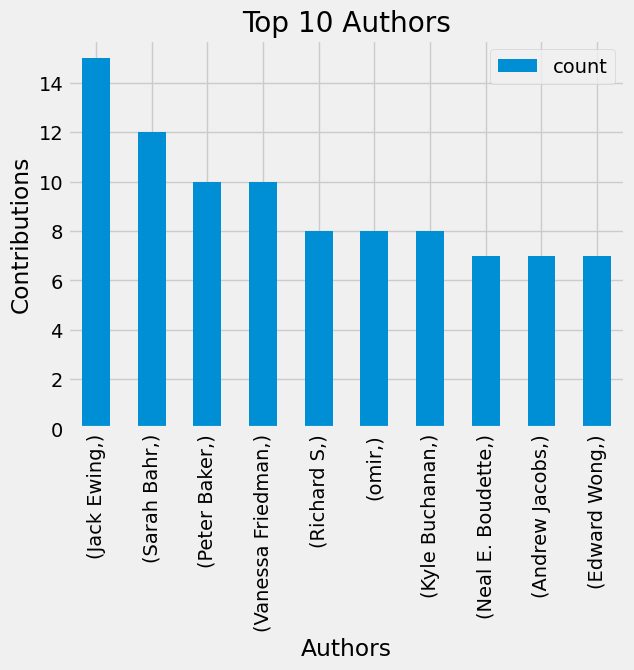

In [8]:
# Visualizing the top contributing authors and their contributions

df['authors'] = df['byline'].apply(getAuthors)
authors_freq = []
df['authors'].apply(lambda x: authors_freq.extend(x))

top_authors = pd.DataFrame(authors_freq, columns=['Author']).value_counts()[:10]
top_authors.plot(kind='bar')

plt.xlabel('Authors')
plt.ylabel('Contributions')
plt.title('Top 10 Authors')
plt.legend()

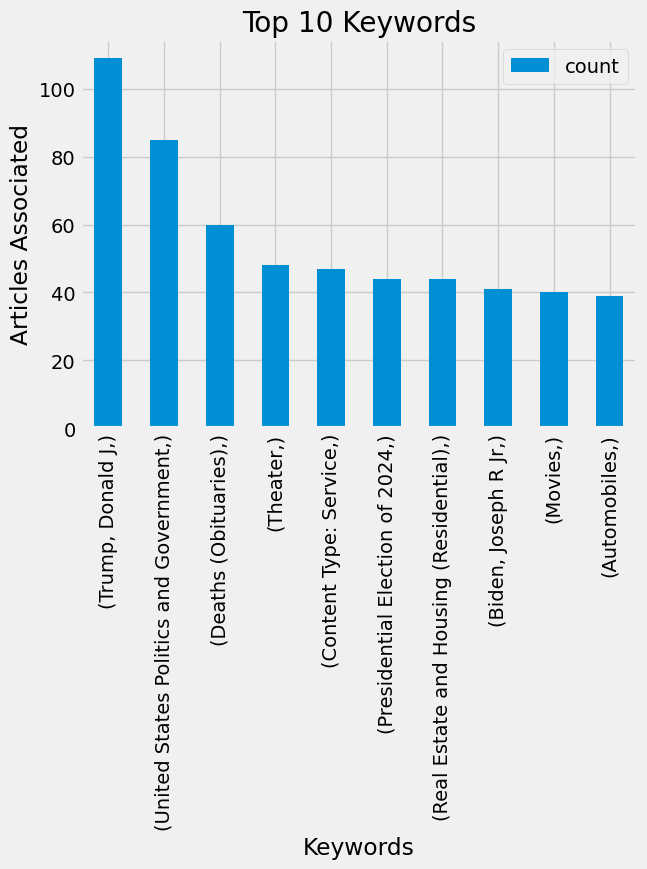

In [9]:
# Visualizing the top keywords in the articles

keyword_freq = []
df['keywords'].apply(lambda x: keyword_freq.extend(x))
keyword_df = pd.DataFrame(keyword_freq, columns=['keyword'])
top_keywords = keyword_df.value_counts()[:10]
top_keywords.plot(kind='bar')

plt.xlabel('Keywords')
plt.ylabel('Articles Associated')
plt.title('Top 10 Keywords')
plt.legend()